In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data fil.es are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv


In [2]:
# Import library
import matplotlib.pyplot as plt

In [3]:
# Load dataset
df = pd.read_csv("/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")


In [4]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(372450, 785)

In [6]:
df.rename(columns={'0':'label'}, inplace = True)

In [7]:
df.describe()

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [8]:
def print_character(index):
    row=df.iloc[index][1:]
    img = np.array(row). reshape(28,28)
    plt.imshow(img)
    print ('Label:',df.iloc[index][0])

Label: 0


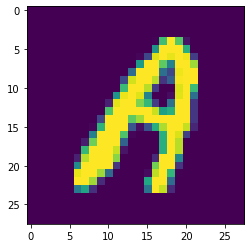

In [9]:
print_character(0)

In [10]:
X=df.drop('label',axis=1)
y=df['label']

In [11]:
print(X.shape)
print (y.shape)

(372450, 784)
(372450,)


In [12]:
#Split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=100)

In [13]:
X_train.shape,X_test.shape

((297960, 784), (74490, 784))

In [14]:
#scaling
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler ()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [16]:
X_train_scaled.shape,X_test_scaled.shape

((297960, 784), (74490, 784))

In [17]:
#y_processing (one hot encoding)
from tensorflow.keras.utils import to_categorical
y_train= to_categorical(y_train,num_classes=26)
y_test=to_categorical(y_test,num_classes=26)

In [18]:
y_train[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
# model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model=Sequential ()
model.add(Dense (100, activation='relu', input_shape=(784,)))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(26, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 26)                2626      
Total params: 91,226
Trainable params: 91,226
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(X_train_scaled,y_train,batch_size=128, epochs=10)

Epoch 1/10
2328/2328 [==============================] - 6s 2ms/step - loss: 0.5919 - accuracy: 0.8389
Epoch 2/10
2328/2328 [==============================] - 6s 2ms/step - loss: 0.1482 - accuracy: 0.9583
Epoch 3/10
2328/2328 [==============================] - 6s 3ms/step - loss: 0.1086 - accuracy: 0.9690
Epoch 4/10
2328/2328 [==============================] - 6s 2ms/step - loss: 0.0906 - accuracy: 0.9748
Epoch 5/10
2328/2328 [==============================] - 6s 3ms/step - loss: 0.0801 - accuracy: 0.9778
Epoch 6/10
2328/2328 [==============================] - 6s 2ms/step - loss: 0.0716 - accuracy: 0.9799
Epoch 7/10
2328/2328 [==============================] - 6s 3ms/step - loss: 0.0635 - accuracy: 0.9819
Epoch 8/10
2328/2328 [==============================] - 6s 2ms/step - loss: 0.0601 - accuracy: 0.9833
Epoch 9/10
2328/2328 [==============================] - 6s 2ms/step - loss: 0.0531 - accuracy: 0.9850
Epoch 10/10
2328/2328 [==============================] - 6s 3ms/step - loss: 0.051

In [24]:
# To predict for the given image
img0=np.array(X_train_scaled[0]).reshape(1,784)


In [25]:
model.predict(img0).argmax()

12

In [26]:
y_train[0].argmax()

12

In [27]:
def recognise(img):
    img=np.array(img).reshape(1,784)
    return model.predict(img).argmax()

In [28]:
y_pre=model.predict(X_test_scaled).argmax(axis=1)

In [29]:
y_pre

array([13, 14,  9, ...,  2,  3, 15])

In [30]:
len(y_pre)

74490

In [31]:
y_test.argmax(axis=1)

array([13, 14,  9, ...,  2,  3, 15])

In [32]:
sum(y_pre==y_test.argmax(axis=1))

72998

In [35]:
72998/74490

0.9799704658343402

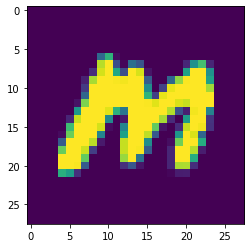

In [36]:
plt.imshow(np.array(X_test_scaled[1000]).reshape(28,28))